<a href="https://colab.research.google.com/github/OmdenaAI/omdena-colombia-socialnetwork/blob/task-5-visualization/src/tasks/task-5-visualization/animated_wordclouds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade git+https://github.com/nexxt-intelligence/DeepMoji@tf-keras
!pip install wordcloud
!wget -nc -qq https://www.wfonts.com/download/data/2016/04/23/symbola/symbola.zip
!unzip -qqo symbola.zip

In [ ]:
from deepmoji import DeepMoji
import string
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rc
import matplotlib.animation as animation

rc('animation', html='jshtml')

# Set figure size for EmojiCloud
plt.rcParams["figure.figsize"] = (20, 20)

In [ ]:
# Instantiate DeepMoji model
emoji_model = DeepMoji()

In [ ]:
# Wrapper class to generate EmojiCloud

class EmojiCloud:
    def __init__(self,
                 font_path='Symbola.ttf',
                 color='yellow'):
        self.font_path = font_path
        self.color = color
        self.word_cloud = self.initialize_wordcloud()
        self.emoji_probability = None

    def initialize_wordcloud(self):
        word_cloud = WordCloud(font_path=self.font_path,
                               width=2000,
                               height=1000,
                               background_color='black',
                               random_state=42,
                               collocations=False)
        return word_cloud

    def color_func(self, word, font_size, position, orientation, random_state=None,
                   **kwargs):
        hue_saturation = {
            'yellow': '42, 88%',
            'blue': '194, 49%',
            'green': '159, 42%',
            'grey': '45, 2%'
        }.get(self.color)

        current_emoji_probability = self.emoji_probability[word]
        if current_emoji_probability >= 0.20:
            opacity = 50
        else:
            opacity = 75 - current_emoji_probability/0.2 * 5
        return f"hsl({hue_saturation},{opacity}%)"

    def generate(self, emojis):
        emoji_frequencies = Counter(emojis)
        total_count = len(emojis)
        self.emoji_probability = {emoji: count/total_count for emoji, count in emoji_frequencies.items()}
        wc = self.word_cloud.generate_from_frequencies(emoji_frequencies)
        return wc 

In [ ]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile

df = pd.read_csv('Corrected_final_all_with_sentiment.csv', encoding="UTF-8")

print("Column headings:")
print(df.columns)

Column headings:
Index(['Unnamed: 0', 'created_at', 'id_str', 'conversation_id_str',
       'full_text', 'twitter_lang', 'favorited', 'retweeted', 'retweet_count',
       'favorite_count', 'reply_count', 'quote_count', 'quoted_status_id_str',
       'quoted_status_short_url', 'quoted_status_expand_url', 'user_id_str',
       'user_name', 'user_full_name', 'user_verified',
       'in_reply_to_status_id_str', 'in_reply_to_user_id_str', 'hashtags',
       'mentions', 'urls', 'media', 'preprocessed_created_at',
       'preprocessed_data', 'emoji_list', 'emoticons_list', 'filename',
       'data_source', 'lang', 'score', 'langTb', 'lang_langdetect',
       'preprocessed_data_without_hashtags', 'sentiment_score'],
      dtype='object')


In [ ]:
#list the emojis for the whole emoji column
emoji = []
for i in df.emoji_list:
    if i != "['']":
      emoji.append(i.replace("[","").replace("]",""))
emoji

["'💙\U0001f90d💙'",
 "'✅'",
 "'🤔📆📆⏰➡'",
 "'👏👏👏👏👏'",
 "'🤣😂🤣🤣🤣😂😂'",
 "'🤣😂🤣'",
 "'🤣🤣😂😂🐶'",
 "'🐶'",
 "'✖'",
 "'🆕✍🔜👇📩📞'",
 "'🎤⤵📹⤵'",
 "'🤔'",
 "'🤔'",
 "'🤡🤡🤡🤡🤡🤡🤡🤡🤡🤡'",
 "'▶📌👇🏻➡📻'",
 "'🤡🤦🏻♀💩'",
 "'❤'",
 "'🗓‼'",
 "'📰'",
 "'📰'",
 "'📰'",
 "'📰'",
 "'📰'",
 "'📢'",
 "'🗣'",
 "'🗣'",
 "'👨🔧👩🔧👩🌾🧑🌾🚩🚩'",
 "'🛠'",
 "'🗓😳'",
 "'🗓'",
 "'🎧📱📱🎧📻🎤👇👇'",
 "'🗣'",
 "'🗣'",
 "'🗣'",
 "'⏰⏰'",
 "'🗣'",
 "'⤵'",
 "'❤🖤'",
 "'💪'",
 "'📆➡🎶🎵'",
 "'🎨'",
 "'🤣🤣😂'",
 "'✊🏼'",
 "'✊🏼🔥'",
 "'🔥🔵'",
 "'😄'",
 "'😉'",
 "'✊🏻'",
 "'🔥🔥'",
 "'✊'",
 "'🧵'",
 "'✔✔✔✔✔🐷💩🐀'",
 "'🤬'",
 "'🤝💪🏾'",
 "'✊🏼🍳'",
 "'🖤🤗'",
 "'🎶❤❤❤'",
 "'😉'",
 "'👊🏻'",
 "'🔥'",
 "'😷🤔😱'",
 "'😷🤔🤑🤬'",
 "'💻🗓🕠✍👉'",
 "'🔥'",
 "'✊'",
 "'🔥'",
 "'✊'",
 "'🍁🔥'",
 "'🚨👇🏽'",
 "'👇🔥'",
 "'💯👐🏾🕹'",
 "'🧵'",
 "'💪🏼🤜🏼🤛🏼'",
 "'🔥🔥'",
 "'💩'",
 "'✅'",
 "'❤👏🏽🔥🔥'",
 "'✊🏽✊🏽✊🏽'",
 "'🔴'",
 "'🔴'",
 "'🤣🤣'",
 "'⬇⬇'",
 "'🤐🚨💩'",
 "'🤐🚨💩'",
 "'📌'",
 "'🤔'",
 "'💜'",
 "'\\U0001fab6'",
 "'🤡'",
 "'✊🏽'",
 "'👇🏼'",
 "'❤🔥'",
 "'📸'",
 "'❤🔥'",
 "'🧵👇🏻'",
 "'⚠'",
 "'❤🔥'",
 "'👇'",
 "'⚠'",
 "'🎙'",
 "'❤🔥'",
 "'\\U0001faa7📷'",
 "'👀'",
 "'🔥'"

In [ ]:
#Creating emoji_cloud for the whole emojis
emoji_cloud = EmojiCloud(font_path='./Symbola.ttf')

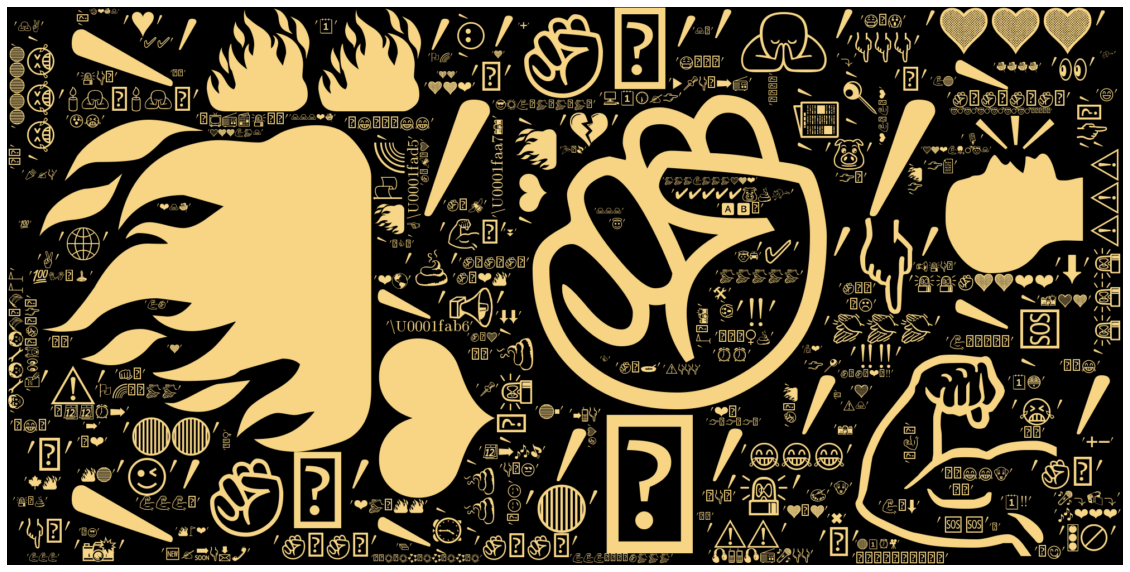

In [ ]:
fig, ax = plt.subplots()

ims = []
for i in range(5):
  wc = emoji_cloud.generate(emoji[:100*(i+1)])
  im = ax.imshow(wc.recolor(color_func=emoji_cloud.color_func, random_state=42),
                   interpolation="bilinear", animated=True)
  if i == 0:
      ax.imshow(wc.recolor(color_func=emoji_cloud.color_func, random_state=42),
                   interpolation="bilinear")  # show an initial one first
  ims.append([im])
  
ax.axis("off")
ani = animation.ArtistAnimation(fig, ims, interval=200, blit=True,
                                repeat_delay=1000)

# To save the animation, use e.g.
ani.save("movie.mp4")
ani